# **Online Shoppers Purchasing Intention**
***

## **About Dataset**
***

Dataset Online Shoppers Purchasing Intention terdiri dari 18 features yang dikelompokan berdasarkan tipe data nya : <br>

| **Numerical data**     | **Categorical data**|
|----------------------- |------------- |
|Administrative | OperatingSystems|
|Administrative_Duration | Browser|
|Informational | Region|
|Informational_Duration | TrafficType|
|ProductRelated | Month|
|ProductRelated_Duration | VisitorType|
|BounceRates | Weekend |
|ExitRates | Revenue|
|PageValues |
|SpecialDay |

## **Import Libraries**
***

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## **Read Dataset**
***

In [9]:
df = pd.read_csv('Data/online_shoppers_intention.csv')

***
## **Descriptive Statistics**
***

**Get Info**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Show Dataframe**

In [11]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11802,0,0.0,0,0.0,47,1204.664683,0.00,0.015000,0.000000,0.0,Dec,2,4,1,2,Returning_Visitor,True,False
3672,0,0.0,0,0.0,5,1144.000000,0.12,0.133333,0.000000,1.0,May,1,1,4,3,Returning_Visitor,True,False
5118,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,May,1,1,6,4,Returning_Visitor,True,False
5023,0,0.0,0,0.0,8,856.416667,0.00,0.028571,44.561143,0.6,May,2,4,9,5,Returning_Visitor,False,True
2418,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.4,May,2,2,1,3,Returning_Visitor,False,False


**Duplicate Values**

In [12]:
df.duplicated().sum()

125

**Group features base on data type**

In [13]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
        'VisitorType', 'Weekend', 'Revenue']

**Describe numericals data**

In [14]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Describe categoricals data**

In [15]:
# Ubah tipe data ke Object (string)
df_cats_string = df[cats].astype(str).copy()

#describe df_cats_string
df_cats_string.describe()

,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,8,13,9,20,10,3,2,2
top,2,2,1,2,May,Returning_Visitor,False,False
freq,6601,7961,4780,3913,3364,10551,9462,10422


***
### **Hasil Observasi Descriptive Statistics**
***

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai? <br>
Semua tipe data sudah sesuai namun ada perubahan sementara tipe data menjadi kategorikal untuk keperluan descriptive analytics seperti OperatingSystems, Browser, Region, Traffic Type, Weekend, dan Revenue.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Tidak ada kolom yang memiliki nilai kosong.

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) <br>
Ada kolom yang memiliki nilai summary agak aneh yaitu hampir semua kolom memiliki nilai min/max terlalu jauh dari mean/median dan termasuk positive skewed distribution.

***
## **Univariate Analysis**
***

Univariate Analysis dilakukan untuk menganalisa setiap kolom secara terpisah, melihat distribusi nilainya secara detail.

### **1. Individual Categorical Analysis**


1.   Revenue (Target variable)
2.   Weekend
3.   Month
4.   Visitor Type
5.   Traffic Type
6.   Browser
7.   Operating System
8.   Region

### Revenue Analysis

In [16]:
# Value count Revenue
df[cats]['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

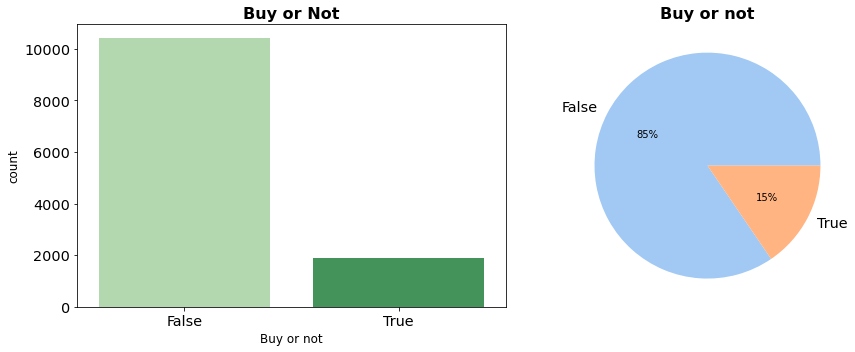

In [17]:
#Distribusi konsumen yang melakukan pembelian

# set the plot size
plt.figure(figsize=(13, 5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Revenue'], palette = 'Greens')
plt.title('Buy or Not', fontweight='bold', fontsize = 16)
plt.xlabel('Buy or not', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Ploting pieplot
plt.subplot(1, 2, 2)
palette_color = sns.color_palette('pastel')
plt.pie(df[cats]['Revenue'].value_counts(), labels=df[cats]['Revenue'].unique(), colors = palette_color, autopct='%.0f%%')
plt.tight_layout()
plt.title('Buy or not', fontweight='bold', fontsize = 16)

#show the plot
plt.show()

**Hasil Observasi**

---


*   Variabel "Revenue" ini merupakan variabel target.
*   Variabel ini mengindikasikan apakah 'visit' konsumen berakhir dengan transaksi pembelian yang menghasilkan revenue.
*   Grafik diatas menunjukan bahwa sangat kecil 'visit' yang berakhir dengan transaksi yang menghasilkan revenue. Hanya **15%** dari total visit yang berujung pada transaksi.
*   Hal ini menunjukan bahwa pada variabel target ini terjadi **class imbalance** karna ada nilai (false) yang mendominasi

### Weekend Analysis

In [18]:
# Value count feature Weekend
df[cats]['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

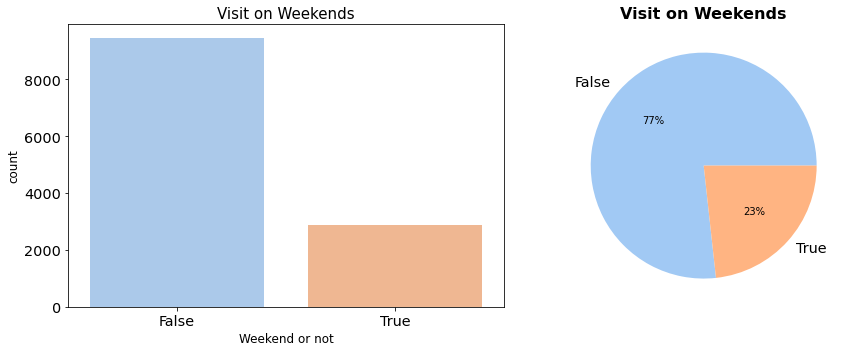

In [19]:
#Distribusi konsumen yang melakukan pembelian di Weekend/Weekdays

# set the plot size
plt.figure(figsize=(13, 5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Weekend'], palette = 'pastel')
plt.title('Visit on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Ploting pieplot
plt.subplot(1, 2, 2)
palette_color = sns.color_palette('pastel')
plt.pie(df[cats]['Weekend'].value_counts(), labels=df[cats]['Weekend'].unique(), colors = palette_color, autopct='%.0f%%')
plt.tight_layout()
plt.title('Visit on Weekends', fontweight='bold', fontsize = 16)

#show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan berapa banyak konsumen yang melakukan visit pada saat weekend. True berarti visit dilakukan saat weekend, False berarti visit dilakukan saat bukan weekend (weekdays).
*   Grafik diatas menunjukan bahwa sebagian besar 'visit' terjadi pada weekday. Hanya **23%** dari total visit yang berlangsung saat weekend.

### Month Analysis

In [20]:
# Value count Month
df[cats]['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

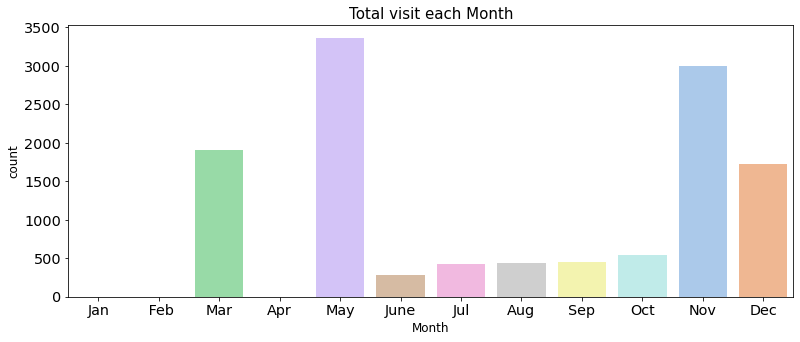

In [21]:
#ordering the month variable
month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
sns.countplot(x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True), palette = 'pastel')
plt.title('Total visit each Month', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan total visit pada masing-masing bulan.
*   Grafik diatas menunjukan bahwa sebagian besar 'visit' terjadi pada bulan Mei, November, Maret dan Desember
*   Terdapat 2 bulan yang tidak memiliki sesi visit sama sekali yaitu bulan Januari dan April

### Visitor Type Analysis

In [22]:
# Value count VisitorType
df[cats]['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

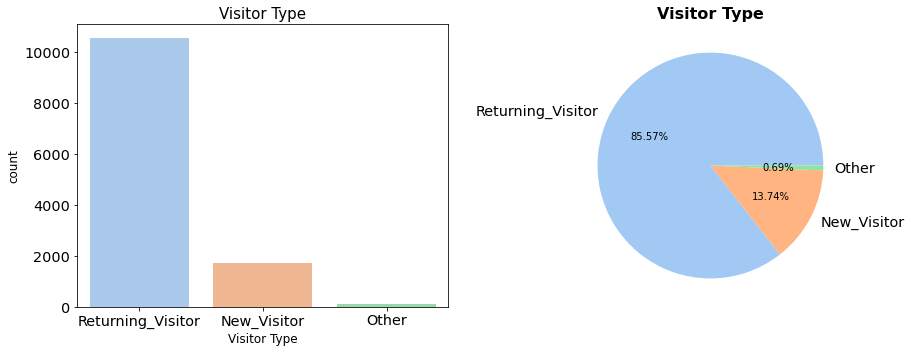

In [23]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['VisitorType'], palette = 'pastel')
plt.title('Visitor Type', fontsize = 15)
plt.xlabel('Visitor Type', fontsize = 12)
plt.ylabel('count', fontsize = 12)


# Ploting pieplot
palette_color = sns.color_palette('pastel')
plt.subplot(1, 2, 2)
plt.pie(df[cats]['VisitorType'].value_counts(), labels=df[cats]['VisitorType'].unique(), colors = palette_color, autopct = '%.2f%%')
plt.tight_layout()
plt.title('Visitor Type', fontweight='bold', fontsize = 16)


# Show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan jenis pengunjung yang melakukan visit.<br>
    Returning visitor merupakan visitor yang sudah pernah berkunjung sebelumnya. <br>
    New visitor merupakan visitor yang baru berkunjung pertama kalinya.
*   Grafik diatas menunjukan bahwa sebagian besar pengunjung yang melakukan 'visit' adalah 'Returning Visitor' yaitu sebanyak 85.57% perbandingannya sangat jauh dengan visitor baru yang belum pernah mengunjungi website sebelumnya

### Traffic Type Analysis

In [24]:
# value count TrafficType
df[cats]["TrafficType"].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

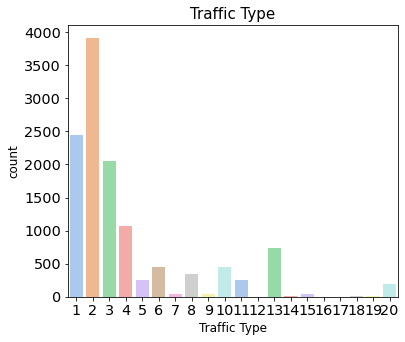

In [25]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['TrafficType'], palette = 'pastel')
plt.title('Traffic Type', fontsize = 15)
plt.xlabel('Traffic Type', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan jumlah visit per masing-masing Tipe Traffic
*   Terdapat banyak value (20) pada data kategorical TrafficType ini
*   Grafik diatas menunjukan bahwa tipe traffic dengan visit terbanyak adalah 2,1, dan 3 secara berurutan.

### Browser Analysis

In [26]:
# value count Browser
df[cats]['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

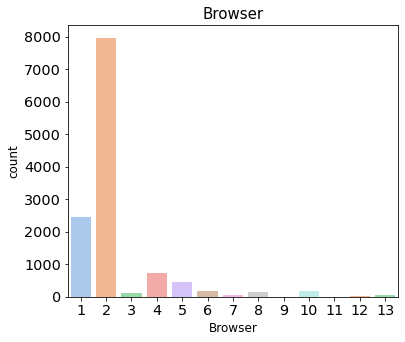

In [27]:
# set the plot size
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Browser'], palette = 'pastel')
plt.title('Browser', fontsize = 15)
plt.xlabel('Browser', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan jumlah visit per masing-masing Tipe Browser
*   Grafik diatas menunjukan bahwa terdapat visit dengan browser 2 lebih dominan dibanding browser lainnya yaitu tipe browser no 1 dan 2.

### Operating System Analysis

In [28]:
# value count Operating Systems
df[cats]['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

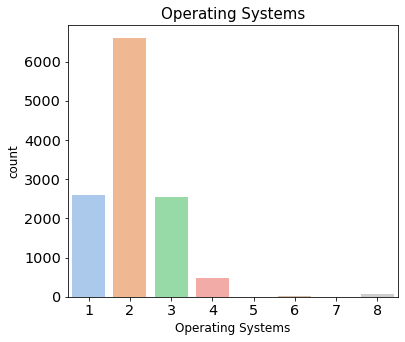

In [29]:
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['OperatingSystems'], palette = 'pastel')
plt.title('Operating Systems', fontsize = 15)
plt.xlabel('Operating Systems', fontsize = 12)
plt.ylabel('count', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan jumlah visit per masing-masing Tipe operating system
*   Grafik diatas menunjukan bahwa visit dengan OS 2 paling dominan digunakan, disusul oleh OS 1 dan 3.

### Region

In [30]:
# value count Region
df[cats]['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

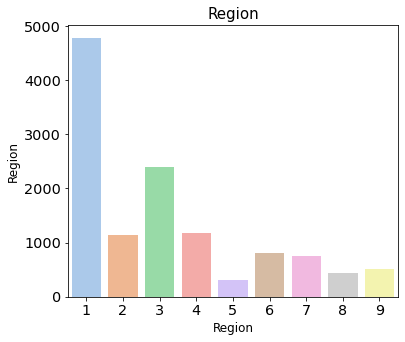

In [31]:
plt.figure(figsize = (13,5))

# Ploting countplot
plt.subplot(1, 2, 1)
sns.countplot(x=df[cats]['Region'], palette = 'pastel')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Region', fontsize = 12)

# Show the plot
plt.show()

**Hasil Observasi**

---

*   Variabel ini mengindikasikan Region dimana visitor melakukan visit.
*   Grafik diatas menunjukan bahwa visitor dominan dari region 1 dan 3, sedangkan sisanya tersebar di 7 region lainnya

***
### **2. Numerical Analysis**

1. Administrative 
2. Administrative_Duration
3. Informational
4. Informational_Duration
5. ProductRelated
6. ProductRelated_Duration
7. BounceRates
8. ExitRates
9. PageValues
10. pecialDay


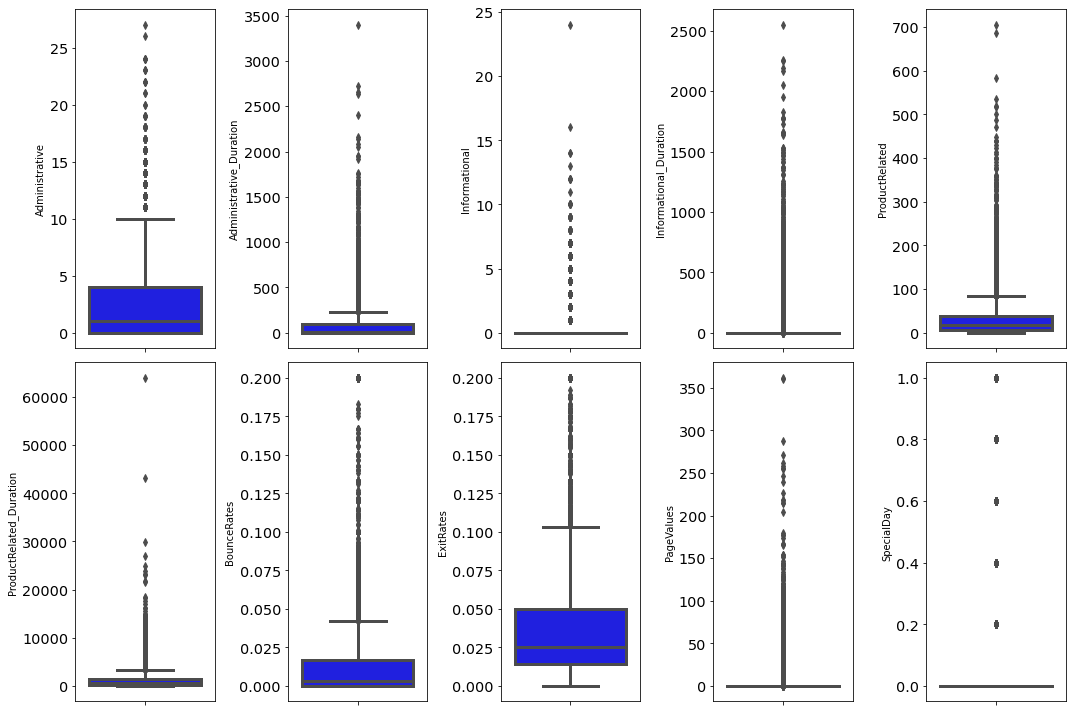

In [32]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

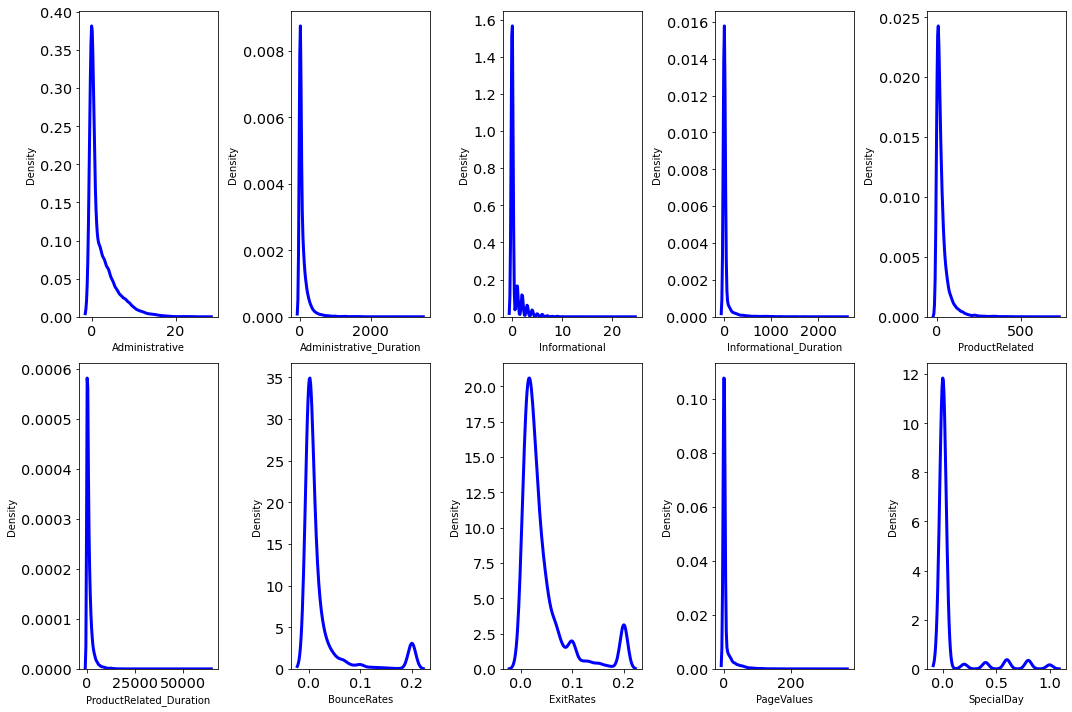

In [33]:
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

In [34]:
skew = df.skew().to_frame()
skew.columns = ['skewness']
skew

C:\Users\Monitoring Bendungan\AppData\Local\Temp\ipykernel_14436\1689257874.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = df.skew().to_frame()


,skewness
Administrative,1.960357
Administrative_Duration,5.615719
Informational,4.036464
Informational_Duration,7.579185
ProductRelated,4.341516
ProductRelated_Duration,7.263228
BounceRates,2.947855
ExitRates,2.148789
PageValues,6.382964
SpecialDay,3.302667


Bagaimana menafsirkan kemiringan Aturan praktis mengatakan:

-Jika kemiringan antara -0,5 dan 0,5, data cukup simetris (distribusi normal). <br>
-Jika kemiringan antara -1 dan -0,5 (miring negatif) atau antara 0,5 dan 1 (miring positif), data memiliki kecondongan sedang. <br>
-Jika kemiringan kurang dari -1 (miring negatif) atau lebih besar dari 1 (miring positif), data sangat miring.

## **Ringkasan Analisa Univariate**

1. Seluruh data numerik memiliki tipe positive skewed yang sangat miring
2. Terdapat terlalu banyak outlier untuk fitur-fitur numerik.
3. Terdapat class imbalance pada target variabel "Revenue".
4. Nilai dominan dari masing-masing fitur sebagai berikut:
    *   Revenue - Visitor yang tidak menghasilkan revenue jauh lebih banyak dibanding visitor menghasilkan revenue.
    *   Weekend- Visitor lebih banyak di Weekdays daripada di weekend
    *   Month - Bulan dengan jumlah visitor signifikan ada di Mei, November, Maret dan Desember. Terdapat 2 bulan tanpa visitor yaitu bulan Januari dan April.
    *   Visitor Type - Visitor yang dominan merupakan Returning Visitor.
    *   Traffic Type - Tipe traffic terbanyak adalah 2,1 dan 3.
    *   Browser - Browser yang dominan digunakan adalah browser 2.
    *   Operating System- Operating System yang lebih banyak digunakan adalah 3 dan 1 

5. Terlalu banyak unique value (20) di fitur traffic type




***
## **Insight untuk Data Pre-Processing**
***

1.   Memutuskan apakah duplicate value digunakan atau tidak
2.   Lakukan encoding fitur: 
        *label encoding untuk fitur Month dan fitur Weekend
        *one-hot encoding untuk fitur Visitor Type
3.   Handling Outliers : antara menggunakan zscore atau IQR

     Nilai lower bound bisa didapatkan menggunakan rumus

     Lb=Q1 -(IQR 1.5)

     Sementara itu, nilai upper bound bisa didapatkan menggunakan rumus

     Ub=Q3+(IQR 1.5)

     Dengan IQR = Q3 – Q1.
4. Handling Class Imbalance menggunakan oversampling atau undersampling method untuk menyeimbangkan label Revenue. Pemilihan kedua metode dilakukan setelah membandingkan hassil evaluasi model. 
5. Lakukan Transformasi :
    * untuk variabel fitur sehingga Machine Learning dapat diaplikasikan- normalisasi
    * Handling Skewed- Log transformation, Transformasi akar kuadrat, Transformasi kekuasaan, Transformasi eksponensial, dan Transformasi Box-Cox



***
## **Multivariate Analysis**
***

#### Numeric Feature

In [35]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

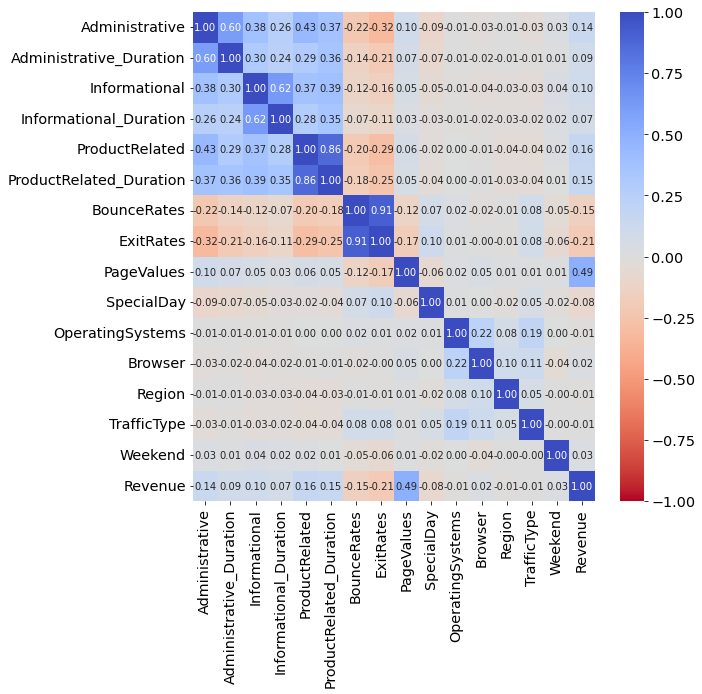

In [100]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

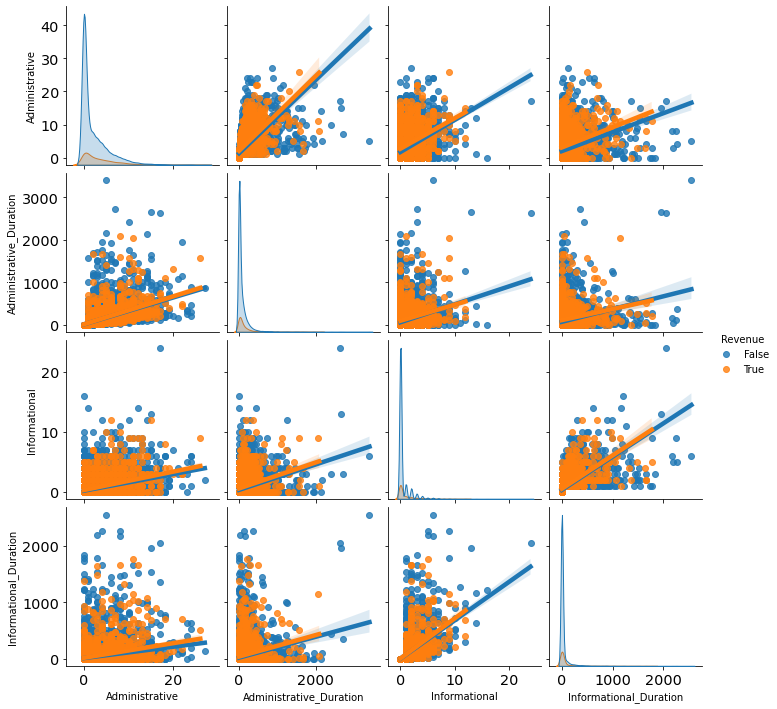

In [94]:
sns.pairplot(df.loc[:,['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'Revenue']],hue='Revenue',kind='reg')

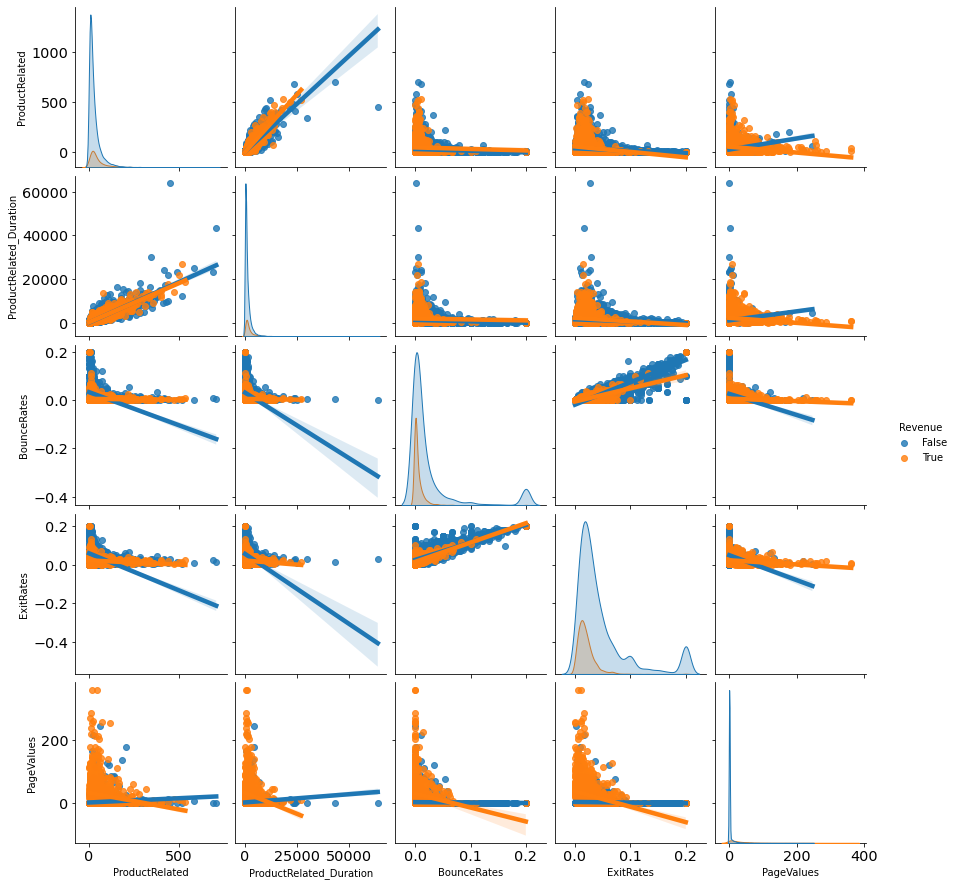

In [95]:
sns.pairplot(df.loc[:,['ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'Revenue']],hue='Revenue',kind='reg')

In [61]:
nums1 = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Revenue']

Text(0.5, 1.05, 'Revenue vs Numeric Feature')

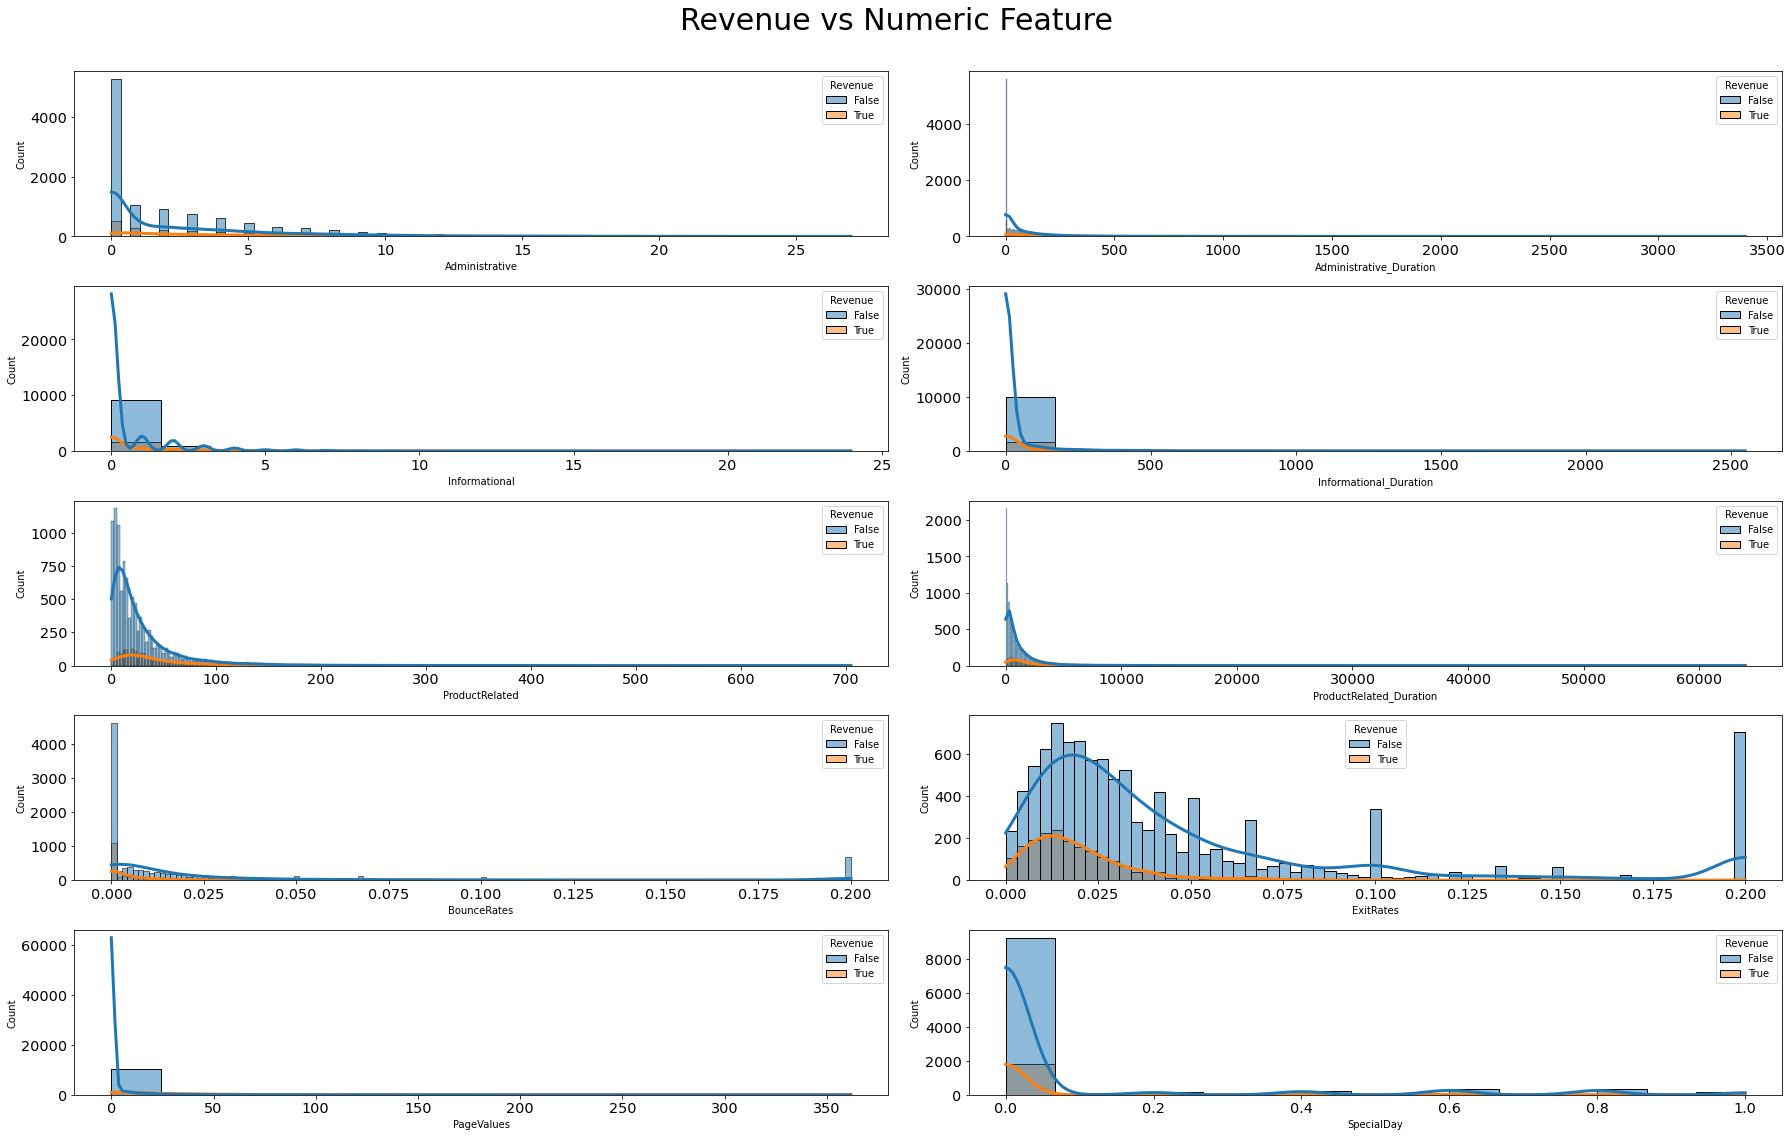

In [96]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 2, i+1)
    sns.histplot(x=df[nums[i]],hue=df['Revenue'],kde=True)
    plt.tight_layout()
fig.suptitle('Revenue vs Numeric Feature', fontsize=30, x=0.5, y=1.05)

#### Categorical Feature

Text(0.5, 0.9, 'Visitor Type Relation')

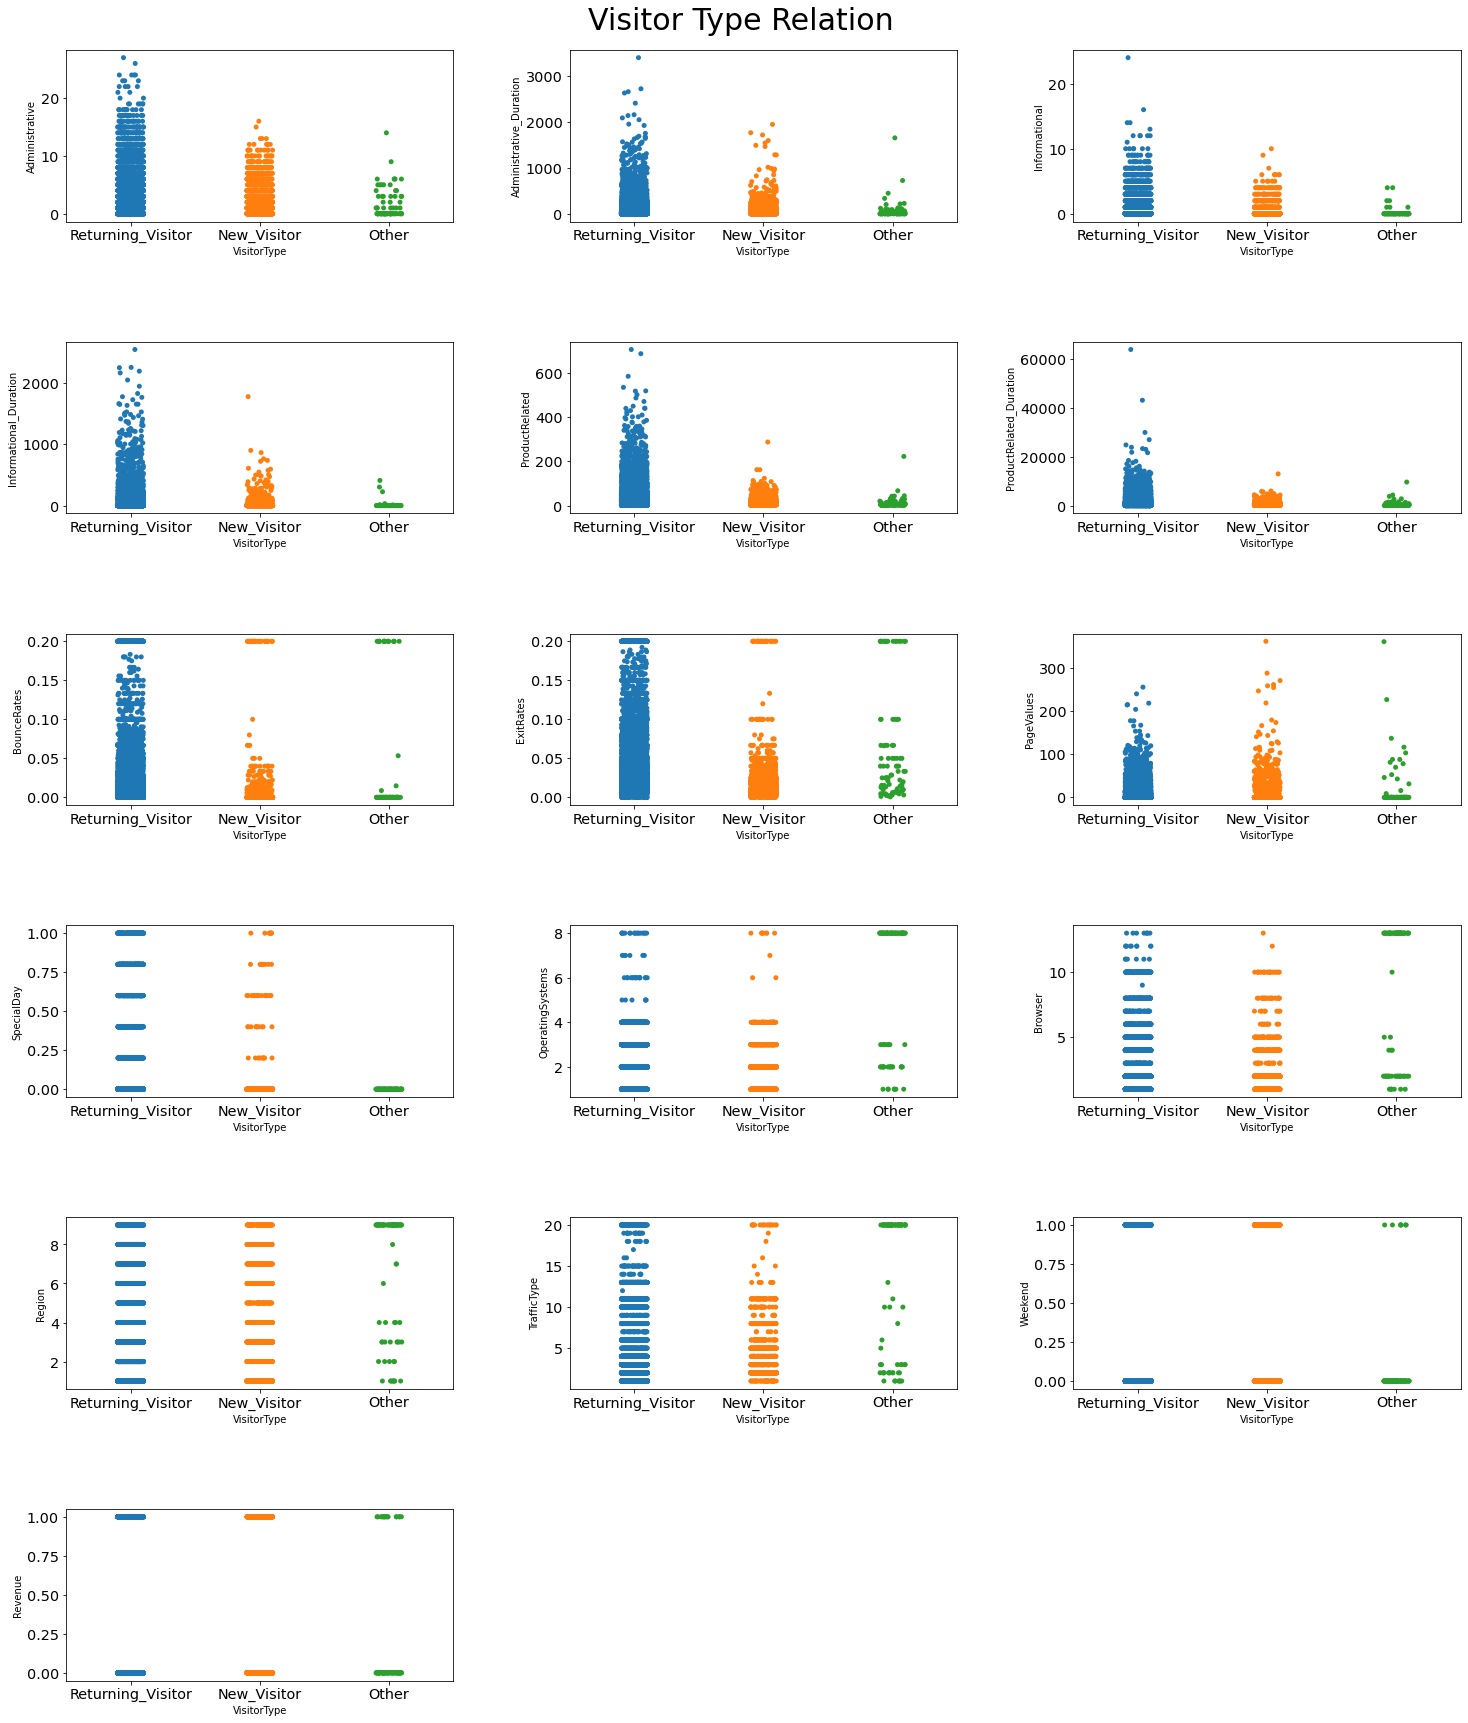

In [63]:
fig = plt.figure(figsize=(25, 30))
for i in range(0, len(nums1)): # untuk setiap kolom numerik
    ax = fig.add_subplot(6, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='VisitorType', y=nums1[i]) # gambar catplot/stripplotnya
    plt.subplots_adjust(hspace=0.7,wspace=0.3)
fig.suptitle('Visitor Type Relation', fontsize=30, x=0.5, y=0.9)

Text(0.5, 0.9, 'Month Relation')

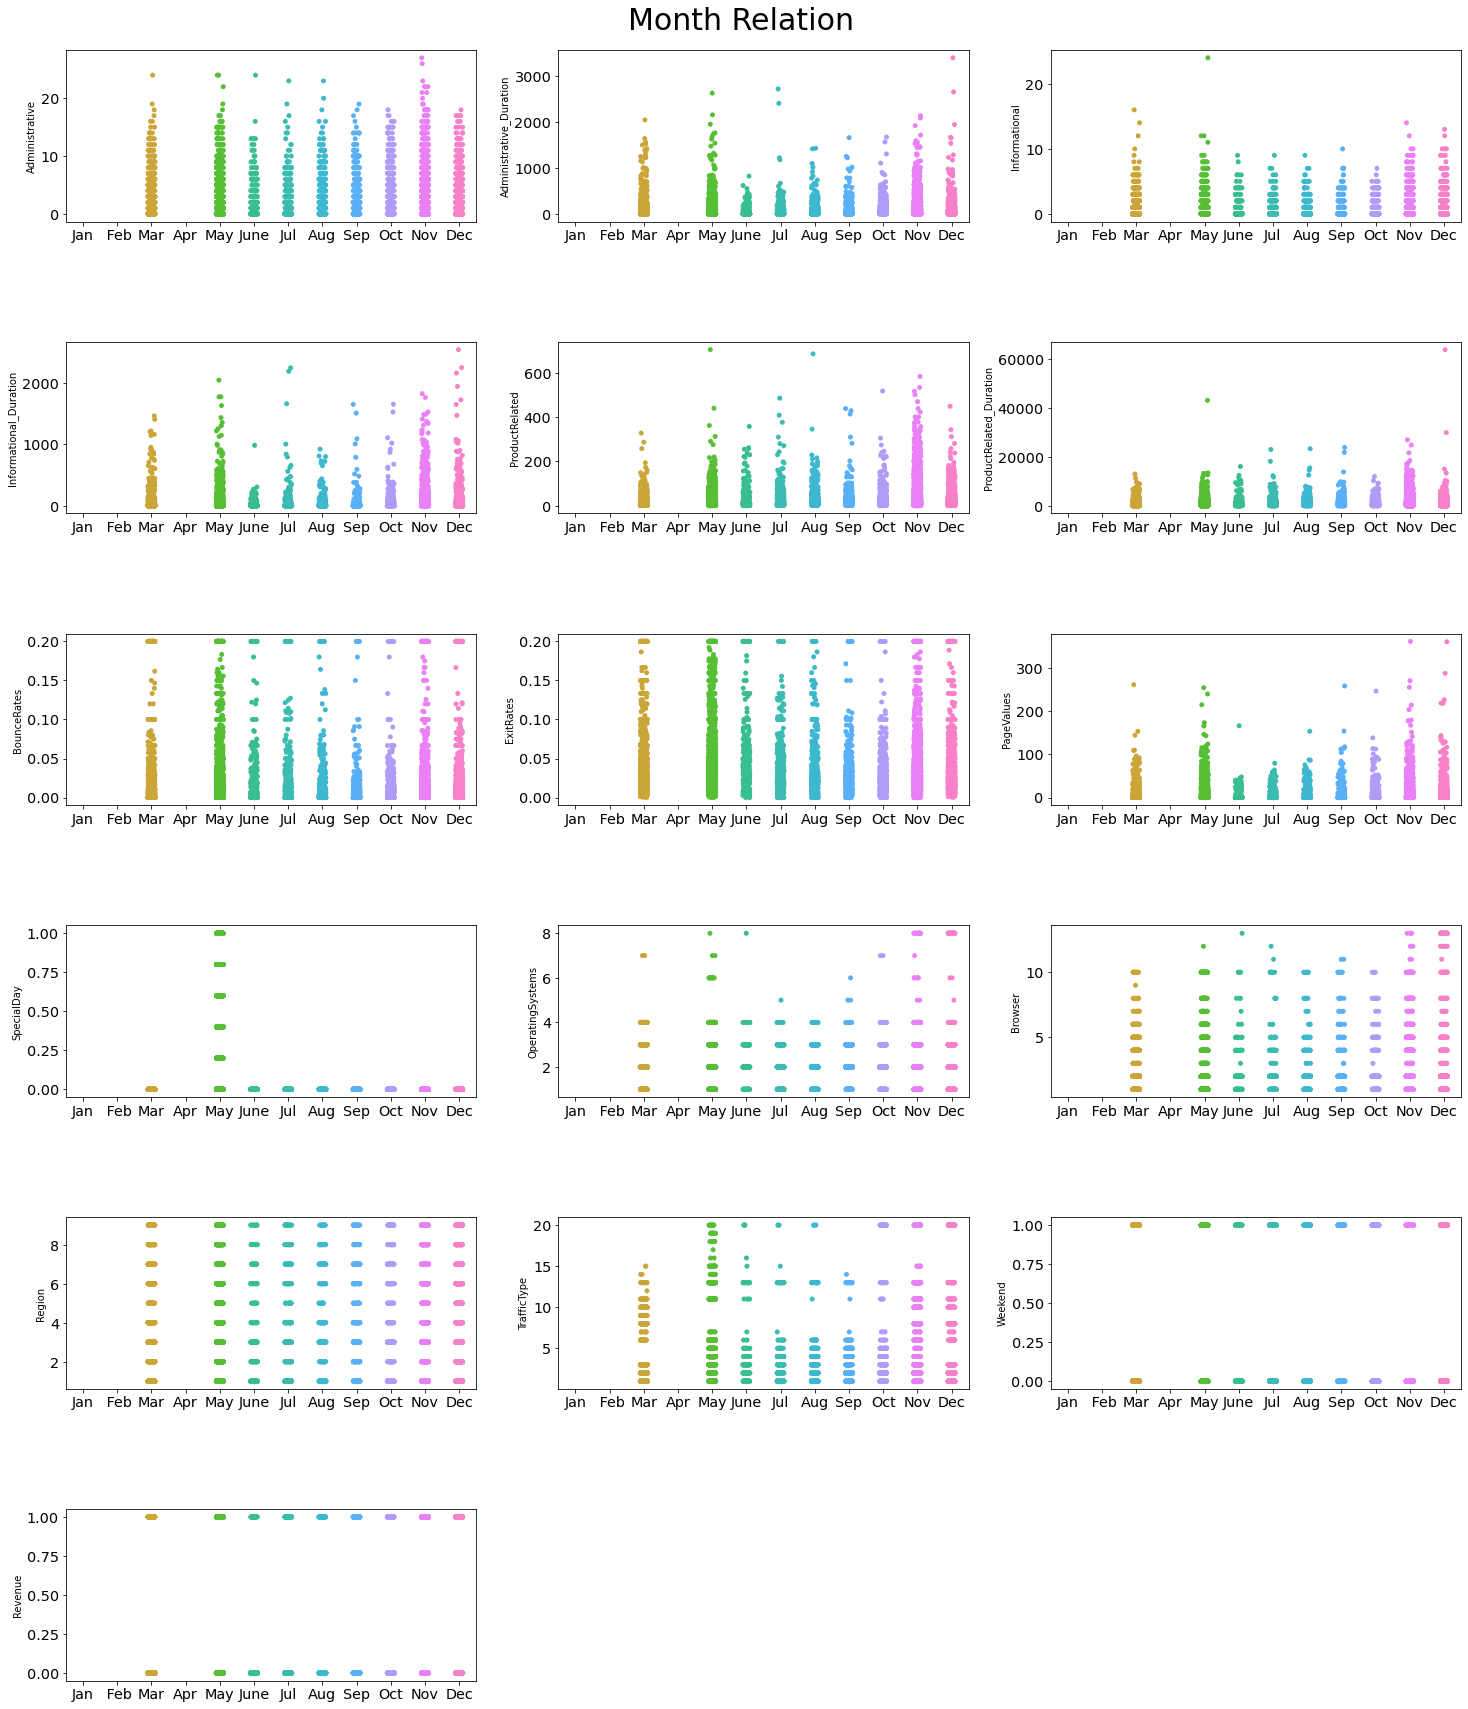

In [65]:
#ordering the month variable
month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig = plt.figure(figsize=(25, 30))
for i in range(0, len(nums1)): # untuk setiap kolom numerik
    ax = fig.add_subplot(6, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True), y=nums1[i]) # gambar catplot/stripplotnya
    plt.subplots_adjust(hspace=0.7,wspace=0.2)
fig.suptitle('Month Relation', fontsize=30, x=0.5, y=0.9)

Text(0.5, 1.05, 'Revenue vs Categorical Feature')

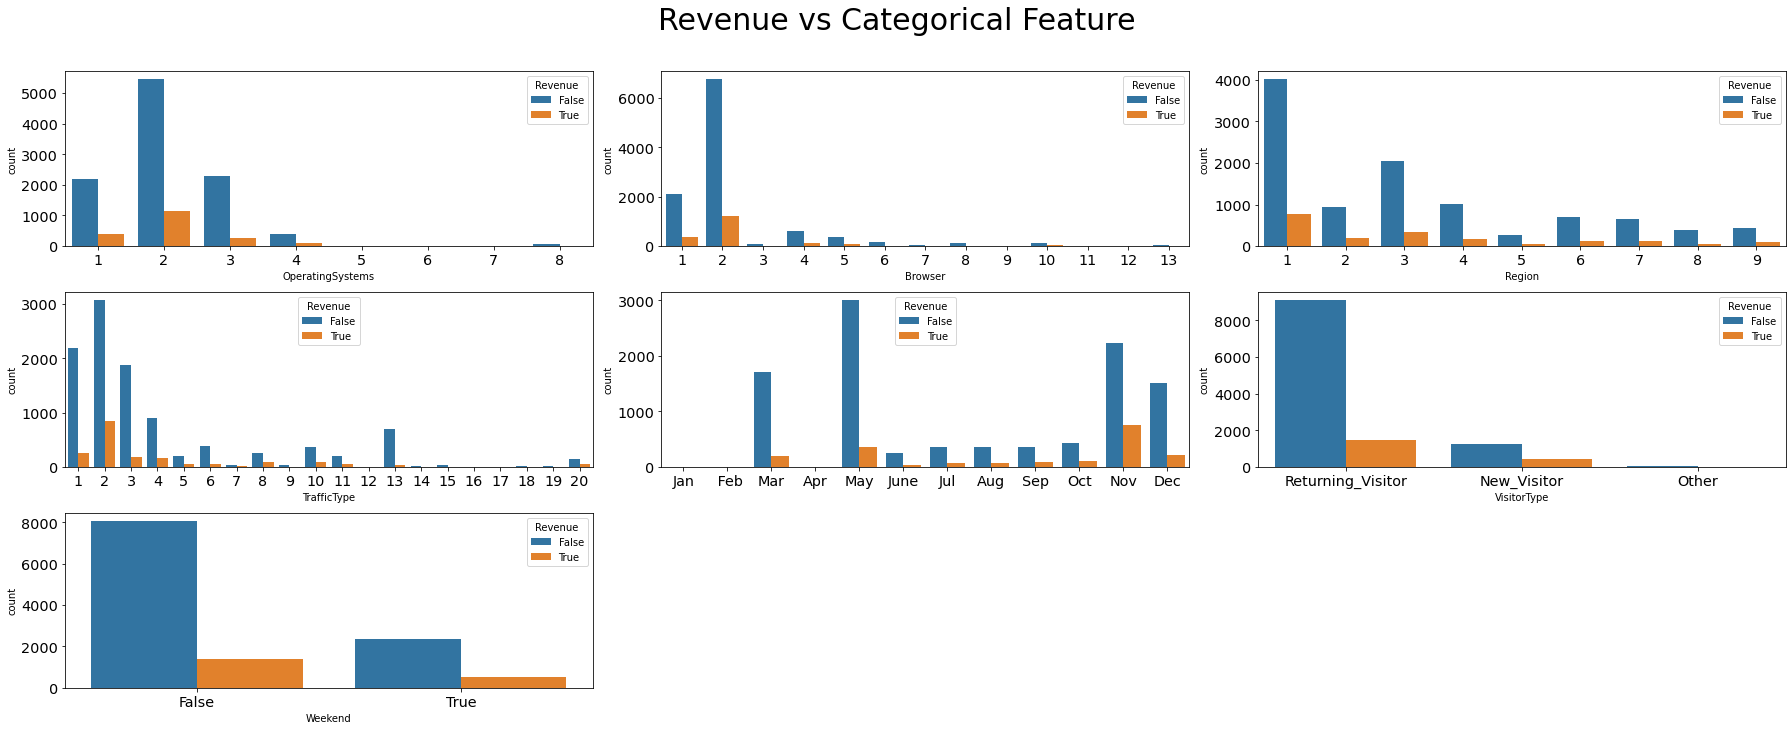

In [98]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(cats)-1):
    ax = fig.add_subplot(5, 3, i+1)
    if cats[i] == 'Month' :
        #ordering the month variable
        month_lookup = ["Jan"," Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        sns.countplot(x=pd.Categorical(df['Month'], categories=month_lookup, ordered=True),hue=df['Revenue'])
    else :
        sns.countplot(x=df[cats[i]],hue=df['Revenue'])
    plt.tight_layout()
fig.suptitle('Revenue vs Categorical Feature', fontsize=30, x=0.5, y=1.05)

***
## **Hasil Analisa Multivariate**
***

#### Degree of correlation:

* Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
* High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
* Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
* Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.
* No correlation: When the value is zero.

* Berdasarkan nilai korelasi antara feature dan target “Revenue”, feature page values mempunyai korelasi moderate positif dengan target. Sedangkan feature lainnya berkorelasi rendah dengan feature target, karena nilai korelasinya +- 0.29. Namun beberapa feature yang mempunyai nilai korelasi +- 0.1 seperti feature bounce rates, exit rates, product related, product related duration, dan aadministrative perlu diperhatikan juga.

* Terdapat korelasi kuat antar feature seperti bounce rates dan exit rates, product related dan product related duration, informational duration dan informational, administrative dan administrative duration. Feature feature ini harus dihilangkan salah satu, karena bersifat redundant. 

* Berdasarkan stripplot, feature visitor type mempunyai pola yang berbeda antar visitor di bagian feature administrative, administrative duration, informational, informational duration, product related, product relate duration, bounce rate, exit rate.

* Berdasarkan stripplot, feature month mempunyai pola yang berbeda pada feature special day. Menurut analisis univariate terdapat 4 bulan tertinggi yang menghasilkan revenue yaitu bulan Mei, November, Maret dan Desember. Namun Nilai Special day yang tertinggi hanya ada di bulan Mei, sedangkan nilai bulan yang lain sama. 


***
## **Insight Bisnis** 
***

1. Metode yang digunakan saat ini belum tepat untuk menghasilkan revenue, hal ini tampil dari data bahwa banyaknya jumlah visitor tidak berakhir dengan revenue.
2. Karena jumlah visitor banyak di weekdays, maka program-program dapat diarahkan di hari-hari weekdays.
3. Jumlah new visitor sangat rendah dibandingkan returning, ini mengindikasikan kemungkinan website ini belum cukup dikenal. Karena dengan nilai returning tinggi, maka visitor yang pernah mengunjungi ada kemungkinan kembali datang. Perlu meningkatkan jumlah visitor baru salah satunya dengan cara branding yang lebih luas.
4. Traffic Type , browser dan operating sistem yang digunakan mengerucut pada 2 sampai 3 jenis saja. Perlu dijajaki kemungkinan kerjasama dengan beberapa jenis browser ini saja. Supaya usaha tepat sasaran.
5. Ada bulan-bulan dengan visitor tinggi, perlu dianalisa ada event khususkah selama itu atau ada promo atau materi yang berbeda di momen-momen ini. 

